In [14]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
nRowsRead = None
df= pd.read_csv(r"C:\Users\Acer\OneDrive\Desktop\Phishing_Email_Detector\New folder\Phishing-Email-Detector\phishing_data_by_type.csv",delimiter=',', nrows = nRowsRead)
df.dataframeName = 'Phishing_paper1.csv'

In [16]:
print('Data type of each columns:')
df.dtypes

Data type of each columns:


Subject    object
Text       object
Type       object
dtype: object

In [17]:
print('Shape of the dataset (rows, columns): ', df.shape)


Shape of the dataset (rows, columns):  (159, 3)


In [18]:
df.isnull().sum()

Subject    2
Text       0
Type       0
dtype: int64

In [19]:
df.describe()

Subject  \
count                                          157   
unique                                         157   
top     URGENT BUSINESS ASSISTANCE AND PARTNERSHIP   
freq                                             1   

                                                     Text   Type  
count                                                 159    159  
unique                                                159      4  
top     URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\...  Fraud  
freq                                                    1     40

In [20]:
df = df.drop_duplicates()
df.shape

(159, 3)

In [21]:
df.columns

Index(['Subject', 'Text', 'Type'], dtype='object')

In [22]:
print('No . of zero values in Total Number of Characters C :',df[df['Total Number of Characters C']==0].shape[0])
print('No . of zero values in Vocabulary richness W/C : ',df[df['Vocabulary richness W/C']==0].shape[0])
print('No . of zero values in Account : ',df[df['Account']==0].shape[0])
print('No . of zero values in Access : ',df[df['Access']==0].shape[0])
print('No . of zero values in Bank : ',df[df['Bank']==0].shape[0])
print('No . of zero values in Credit : ',df[df['Credit']==0].shape[0])
print('No . of zero values in Click : ',df[df['Click']==0].shape[0])
print('No . of zero values in Identity : ',df[df['Identity']==0].shape[0])
print('No . of zero values in Inconvenience : ',df[df['Inconvenience']==0].shape[0])
print('No . of zero values in Information : ',df[df['Information']==0].shape[0])
print('No . of zero values in Limited : ',df[df['Limited']==0].shape[0])
print('No . of zero values in Minutes : ',df[df['Minutes']==0].shape[0])
print('No . of zero values in Password : ',df[df['Password']==0].shape[0])
print('No . of zero values in Recently : ',df[df['Recently']==0].shape[0])
print('No . of zero values in Risk : ',df[df['Risk']==0].shape[0])
print('No . of zero values in Social : ',df[df[ 'Social']==0].shape[0])
print('No . of zero values in Security : ',df[df['Security']==0].shape[0])
print('No . of zero values in Service : ',df[df['Service']==0].shape[0])
print('No . of zero values in Suspended : ' ,df[df['Suspended']==0].shape[0])
print('No . of zero values in Total number of Function words/W : ',df[df['Total number of Function words/W']==0].shape[0])
print('No . of zero values in Unique Words : ' ,df[df['Unique Words']==0].shape[0])
print('No . of zero values in Phishing Status : ' ,df[df['Phishing Status']==0].shape[0])


KeyError: 'Total Number of Characters C'

In [10]:
! pip install streamlit nltk pillow pyttsx3 imapclient beautifulsoup4 requests pandas matplotlib



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# View number of unique values and the values of each attributes
for i in df.columns.tolist():
    print(i, '=', df[i].nunique(), "unique values")
    print(df[i].unique())
    print()

Total Number of Characters C = 17773 unique values
[ 1673  4465  6813 ... 18022 23474 57081]

Vocabulary richness W/C = 179799 unique values
[0.12851166 0.13773796 0.09599295 ... 0.15966867 0.1390791  0.15990918]

Account = 27 unique values
[ 2  0  7  3  1  6  5  8  4 10 12  9 11 13 15 17 16 20 21 14 18 24 22 23
 19 29 63]

Access = 31 unique values
[ 0  3  2  1  4  5  6  7  8 10 11 14  9 19 12 13 27 26 25 16 53 55 65 18
 15 17 22 23 35 20 30]

Bank = 28 unique values
[ 0  1  4  2  3  6  5 31  7  8  9 10 16 11 12 15 13 30 20 14 21 17 23 22
 19 28 34 24]

Credit = 60 unique values
[ 0  2  1 10  3  4 12  9  5 16 15 17 22  8  6  7 24 14 11 18 21 13 62 35
 32 27 69 81 40 28 20 63 19 37 44 42 29 76 31 26 54 86 38 55 60 85 30 23
 88 33 34 49 25 47 50 36 46 41 43 39]

Click = 27 unique values
[ 1  0  2  5  3  4 14  6 12  8  7 16 19 10 11  9 18 17 13 15 20 48 30 21
 25 28 26]

Identity = 8 unique values
[0 1 2 3 4 5 6 9]

Inconvenience = 4 unique values
[0 1 2 3]

Information = 45 unique value

KeyError: 'Phishing Status'

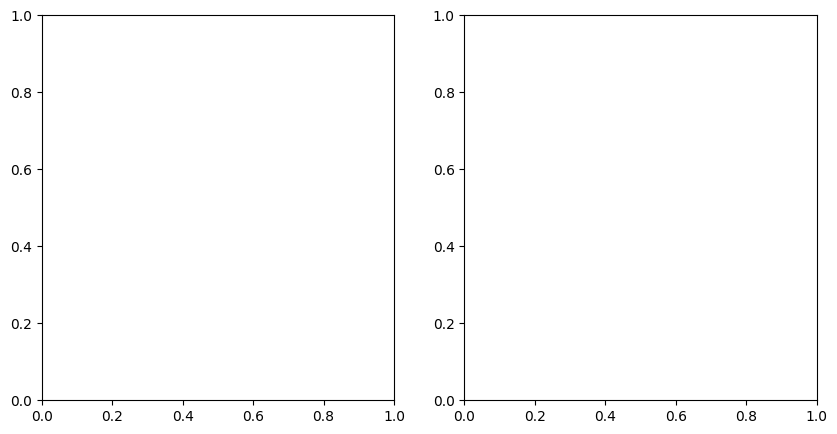

In [ ]:
f,ax = plt.subplots(1,2,figsize=(10,5))
df['Phishing Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x=df['Phishing Status'],data=df,ax=ax[1])
ax[1].set_title('Outcome')
N,P =df['Phishing Status'].value_counts()
print('Negative (0) : ' , N)
print('Positive (1) : ' , P)
plt.grid()
plt.show()


In [21]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
import seaborn as sns 
corrmat =df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g =sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

ValueError: could not convert string to float: 'URGENT BUSINESS ASSISTANCE AND PARTNERSHIP'

In [14]:
df

Total Number of Characters C  Vocabulary richness W/C  Account  \
0                               1673                 0.128512        2   
1                               4465                 0.137738        0   
2                               6813                 0.095993        0   
3                               1518                 0.109354        0   
4                               1881                 0.126528        7   
...                              ...                      ...      ...   
525745                          2158                 0.104263        0   
525748                          1003                 0.139581        0   
525750                           582                 0.108247        0   
525751                           748                 0.121658        0   
525753                          3083                 0.159909        0   

        Access  Bank  Credit  Click  Identity  Inconvenience  Information  \
0            0     0       0      1         0              0            1   
1            0     0       0      0         0              0            4   
2            0     0       2      0         0              0            2   
3            0     0       1      1         0              0            0   
4            3     0       0      0         1              0            2   
...        ...   ...     ...    ...       ...            ...          ...   
525745       1     0       0      0         0              0            0   
525748       0     0       0      0         0              0            0   
525750       0     0       0      0         0              0            0   
525751       0     0       0      0         0              0            0   
525753       0     0       0      0         0              0            0   

        ...  Password  Recently  Risk  Social  Security  Service  Suspended  \
0       ...         1         1     0       0         0        0          0   
1       ...         0         0     0       0         3        1          0   
2       ...         0         0     0       0         0        0          0   
3       ...         0         0     0       0         0        0          0   
4       ...         0         0     0       0         0        0          2   
...     ...       ...       ...   ...     ...       ...      ...        ...   
525745  ...         0         0     0       0         0        0          0   
525748  ...         0         0     0       0         0        0          0   
525750  ...         0         0     0       0         0        0          0   
525751  ...         0         0     0       0         0        0          0   
525753  ...         0         0     1       0         0        0          0   

        Total number of Function words/W  Unique Words  Phishing Status  
0                               0.027907           132                1  
1                               0.013008           338                1  
2                               0.006116           292                1  
3                               0.012048           102                1  
4                               0.063025           136                1  
...                                  ...           ...              ...  
525745                          0.004444           146                0  
525748                          0.000000           104                0  
525750                          0.000000            55                0  
525751                          0.000000            66                0  
525753                          0.002028           228                0  

[451085 rows x 22 columns]

In [15]:
df = df.rename(columns={'Phishing Status': 'Target'})


In [16]:
df

Total Number of Characters C  Vocabulary richness W/C  Account  \
0                               1673                 0.128512        2   
1                               4465                 0.137738        0   
2                               6813                 0.095993        0   
3                               1518                 0.109354        0   
4                               1881                 0.126528        7   
...                              ...                      ...      ...   
525745                          2158                 0.104263        0   
525748                          1003                 0.139581        0   
525750                           582                 0.108247        0   
525751                           748                 0.121658        0   
525753                          3083                 0.159909        0   

        Access  Bank  Credit  Click  Identity  Inconvenience  Information  \
0            0     0       0      1         0              0            1   
1            0     0       0      0         0              0            4   
2            0     0       2      0         0              0            2   
3            0     0       1      1         0              0            0   
4            3     0       0      0         1              0            2   
...        ...   ...     ...    ...       ...            ...          ...   
525745       1     0       0      0         0              0            0   
525748       0     0       0      0         0              0            0   
525750       0     0       0      0         0              0            0   
525751       0     0       0      0         0              0            0   
525753       0     0       0      0         0              0            0   

        ...  Password  Recently  Risk  Social  Security  Service  Suspended  \
0       ...         1         1     0       0         0        0          0   
1       ...         0         0     0       0         3        1          0   
2       ...         0         0     0       0         0        0          0   
3       ...         0         0     0       0         0        0          0   
4       ...         0         0     0       0         0        0          2   
...     ...       ...       ...   ...     ...       ...      ...        ...   
525745  ...         0         0     0       0         0        0          0   
525748  ...         0         0     0       0         0        0          0   
525750  ...         0         0     0       0         0        0          0   
525751  ...         0         0     0       0         0        0          0   
525753  ...         0         0     1       0         0        0          0   

        Total number of Function words/W  Unique Words  Target  
0                               0.027907           132       1  
1                               0.013008           338       1  
2                               0.006116           292       1  
3                               0.012048           102       1  
4                               0.063025           136       1  
...                                  ...           ...     ...  
525745                          0.004444           146       0  
525748                          0.000000           104       0  
525750                          0.000000            55       0  
525751                          0.000000            66       0  
525753                          0.002028           228       0  

[451085 rows x 22 columns]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [19]:
target = 'Target'
y = df[target]
X = df.drop(target,axis=1)

In [20]:
X.head()

Total Number of Characters C  Vocabulary richness W/C  Account  Access  \
0                          1673                 0.128512        2       0   
1                          4465                 0.137738        0       0   
2                          6813                 0.095993        0       0   
3                          1518                 0.109354        0       0   
4                          1881                 0.126528        7       3   

   Bank  Credit  Click  Identity  Inconvenience  Information  ...  Minutes  \
0     0       0      1         0              0            1  ...        0   
1     0       0      0         0              0            4  ...        0   
2     0       2      0         0              0            2  ...        0   
3     0       1      1         0              0            0  ...        0   
4     0       0      0         1              0            2  ...        0   

   Password  Recently  Risk  Social  Security  Service  Suspended  \
0         1         1     0       0         0        0          0   
1         0         0     0       0         3        1          0   
2         0         0     0       0         0        0          0   
3         0         0     0       0         0        0          0   
4         0         0     0       0         0        0          2   

   Total number of Function words/W  Unique Words  
0                          0.027907           132  
1                          0.013008           338  
2                          0.006116           292  
3                          0.012048           102  
4                          0.063025           136  

[5 rows x 21 columns]

In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [23]:
X_train.shape,y_train.shape

((360868, 21), (360868,))

In [24]:
X_test.shape,y_test.shape

((90217, 21), (90217,))

In [25]:
360868 + 90217

451085

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [12]:
nb = GaussianNB()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
clfs = {
    'SVM' : svm,
    'KNN' : knn, 
    'NB': nb, 
    'DT': dt,  
    'RF': rf, 
}

In [28]:
type(X_test)

pandas.core.frame.DataFrame

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(360868, 21)
(90217, 21)
(360868,)
(90217,)


In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Create the classifiers
nb = GaussianNB()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
svc = SVC()
dt = DecisionTreeClassifier()

clfs = {
    'SVM': svc,
    'KNN': knn, 
    'NB': nb, 
    'DT': dt,  
    'RF': rf, 
}

# Loop through the classifiers
for clf_name, clf in clfs.items():
    # Start the timer for training
    start_time_train = time.time()
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # End the timer for training
    end_time_train = time.time()
    
    # Calculate the time taken for training
    time_taken_train = end_time_train - start_time_train
    
    # Start the timer for testing
    start_time_test = time.time()

    # Test the model
    X_test_array = X_test.values  # Convert X_test to a NumPy array
    y_pred = clf.predict(X_test_array)
    
    # End the timer for testing
    end_time_test = time.time()
    
    # Calculate the time taken for testing
    time_taken_test = end_time_test - start_time_test
    
    # Calculate accuracy and precision
    #train_accuracy = score(X_train,y_train)
    accuracy= accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    
    # Print the results
    print("Classifier: ", clf_name)
    print("Training time: {:.2f} seconds".format(time_taken_train))
    print("Testing time: {:.2f} seconds".format(time_taken_test))
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print()


NameError: name 'X_train' is not defined

In [32]:
import time 
def train_classifier(clf,X_train,y_train,X_test,y_test):
    start_time_train = time.time()
    clf.fit(X_train,y_train)
    end_time_train = time.time()
    time_taken_train = end_time_train - start_time_train
    start_time_test = time.time()
    X_test_array = X_test.values  
    y_pred = clf.predict(X_test_array)
    end_time_test = time.time()
    
    # Calculate the time taken for testing
    time_taken_test = end_time_test - start_time_test
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return time_taken_train,time_taken_test,accuracy,precision

In [33]:
accuracy_scores = []
precision_scores = []
train_time =[]
test_time =[]

for name,clf in clfs.items():
    
    current_traintime , current_testtime ,current_accuracy,current_precision= train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Training time: {:.2f} seconds".format(current_traintime))
    print("Testing time: {:.2f} seconds".format(current_testtime))
    print("Accuracy: {:.4f}".format(current_accuracy))
    print("Precision: {:.4f}".format(current_precision))
    print()
    train_time.append(current_traintime)
    test_time.append(current_testtime)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


For  SVM
Training time: 423.45 seconds
Testing time: 313.30 seconds
Accuracy: 0.9813
Precision: 0.5000



c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


For  KNN
Training time: 0.11 seconds
Testing time: 152.58 seconds
Accuracy: 0.9832
Precision: 0.6972



c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


For  NB
Training time: 0.31 seconds
Testing time: 0.06 seconds
Accuracy: 0.9667
Precision: 0.2822



c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


For  DT
Training time: 9.42 seconds
Testing time: 0.06 seconds
Accuracy: 0.9910
Precision: 0.7735



c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


For  RF
Training time: 133.61 seconds
Testing time: 1.99 seconds
Accuracy: 0.9944
Precision: 0.9632



In [34]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores }).sort_values('Precision',ascending=False)

In [35]:
performance_df

Algorithm  Accuracy  Precision
4        RF  0.994413   0.963195
3        DT  0.991022   0.773550
1       KNN  0.983163   0.697183
0       SVM  0.981301   0.500000
2        NB  0.966691   0.282221

In [36]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

Algorithm   variable     value
0        RF   Accuracy  0.994413
1        DT   Accuracy  0.991022
2       KNN   Accuracy  0.983163
3       SVM   Accuracy  0.981301
4        NB   Accuracy  0.966691
5        RF  Precision  0.963195
6        DT  Precision  0.773550
7       KNN  Precision  0.697183
8       SVM  Precision  0.500000
9        NB  Precision  0.282221

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


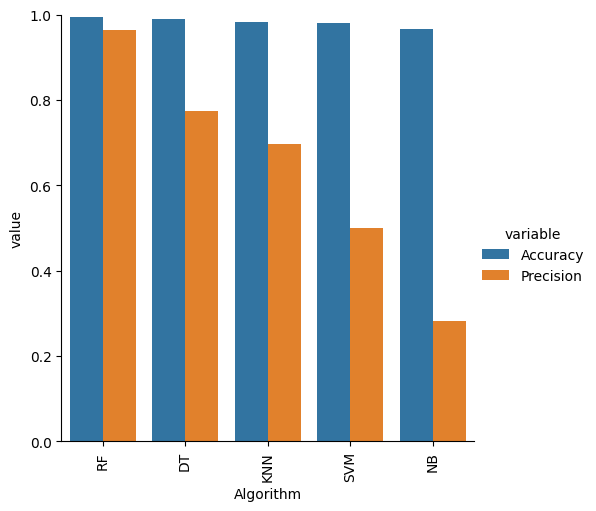

In [37]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [38]:
correctly_classified_rates = []
incorrectly_classified_rates = []

for name, clf in clfs.items():
    X_test_array = X_test.to_numpy()  # Convert X_test DataFrame to NumPy array
    y_pred = clf.predict(X_test_array)

    print("For", name)

    # Calculate correctly and incorrectly classified rates
    correctly_classified = np.sum(y_pred == y_test)
    incorrectly_classified = np.sum(y_pred != y_test)
    n_samples = len(y_test)
    correctly_classified_rate = correctly_classified / n_samples
    incorrectly_classified_rate = incorrectly_classified / n_samples
    correctly_classified_rates.append(correctly_classified_rate)
    incorrectly_classified_rates.append(incorrectly_classified_rate)

    print("Correctly classified rate: {:.2f}%".format(correctly_classified_rate * 100))
    print("Incorrectly classified rate: {:.2f}%".format(incorrectly_classified_rate * 100))
    print()


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


For SVM
Correctly classified rate: 98.13%
Incorrectly classified rate: 1.87%



c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


For KNN
Correctly classified rate: 98.32%
Incorrectly classified rate: 1.68%

For NB
Correctly classified rate: 96.67%
Incorrectly classified rate: 3.33%

For DT
Correctly classified rate: 99.10%
Incorrectly classified rate: 0.90%



c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


For RF
Correctly classified rate: 99.44%
Incorrectly classified rate: 0.56%



In [39]:
performance_df3 = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'TrainTime': train_time,
    'TestTime': test_time
})

# Calculate the sum of train time and test time
performance_df3['TotalTime'] = performance_df3['TrainTime'] + performance_df3['TestTime']

# Sort the DataFrame based on the total time in ascending order
performance_df3 = performance_df3.sort_values('TotalTime', ascending=True)

In [40]:
performance_df3

Algorithm  Accuracy  Precision   TrainTime    TestTime   TotalTime
2        NB  0.966691   0.282221    0.312482    0.062499    0.374980
3        DT  0.991022   0.773550    9.422091    0.062498    9.484589
4        RF  0.994413   0.963195  133.612017    1.986698  135.598715
1       KNN  0.983163   0.697183    0.109373  152.584908  152.694280
0       SVM  0.981301   0.500000  423.445683  313.299019  736.744701